In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [7]:
# Use Pandas to import the data from epa-sea-level.csv.
df = pd.read_csv('epa-sea-level.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
None
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NO

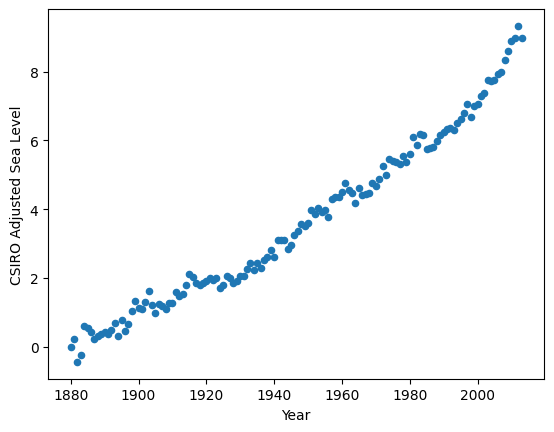

In [9]:
# Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis
fig = df.plot.scatter(x='Year', y='CSIRO Adjusted Sea Level').figure

plt.title('')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

plt.show()

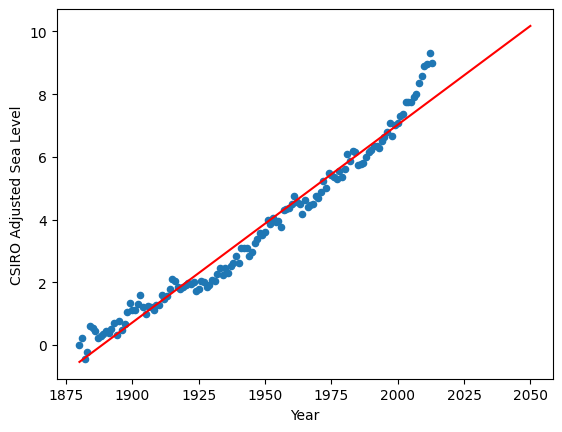

In [14]:
# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
# Plot the line of best fit over the top of the scatter plot.
# Make the line go through the year 2050 to predict the sea level rise in 2050.

# calculate regression
reg1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

#create extended x axis (since data only goes to 2013):
xtnd1 = pd.Series(list(range(1880, 2051)))

#plot the scatter again:
fig = df.plot.scatter(x='Year', y='CSIRO Adjusted Sea Level').figure

plt.title('')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

#plot the regression line:
plt.plot(xtnd1, reg1.intercept + reg1.slope* xtnd1, 'r')



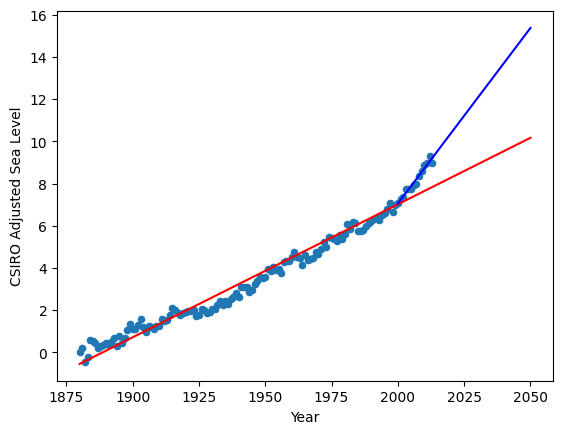

In [15]:
#Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
# Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
# The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

# Get just the data since 2000:
df_recent = df[df['Year']>=2000]

# Calculate regression:
res2 = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

#Create extended x axis (since data only goes to 2013):
xtnd2 = pd.Series(list(range(2000, 2051)))

#plot the scatter again:
fig = df.plot.scatter(x='Year', y='CSIRO Adjusted Sea Level').figure

plt.title('')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')

#plot the first regression line:
plt.plot(xtnd1, reg1.intercept + reg1.slope* xtnd1, 'r')

#plot the second regression line:
plt.plot(xtnd2, res2.intercept + res2.slope* xtnd2, 'b')